In [1]:
import pandas as pd
import numpy as np

## plotting libraries
from matplotlib import pyplot as plt

## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

In [3]:
#Read that data into Python and call the dataframe churnData
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
#Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. 
#Convert this column into numeric type using pd.to_numeric function

churnData.dtypes
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
# Check for null values in the DataFrame
print(churnData.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
# Replace null values
# fill the NaN elements with mean
churnData.fillna(churnData['TotalCharges'].mean(), inplace=True)

# Check for null values in the DataFrame again
print(churnData.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
input_features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']


In [8]:
# Print out a correlation matrix
corr_input_feat = churnData[input_features].corr()
print(corr_input_feat)

                  tenure  SeniorCitizen  MonthlyCharges  TotalCharges
tenure          1.000000       0.016567        0.247900      0.824757
SeniorCitizen   0.016567       1.000000        0.220173      0.102395
MonthlyCharges  0.247900       0.220173        1.000000      0.650468
TotalCharges    0.824757       0.102395        0.650468      1.000000


In [9]:
selected_features = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

In [10]:
X = churnData.loc[:, selected_features]
y = churnData.Churn

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TT_SPLIT, random_state = RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,SeniorCitizen,MonthlyCharges,TotalCharges
6924,0,69.35,69.35
5249,0,67.20,4671.70
5852,1,69.10,1474.75


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc, columns = selected_features)
X_test_sc  = pd.DataFrame(X_test_sc, columns = selected_features)

# Logistic Regression

In [13]:
def get_model_LogisticRegression(X_tn, X_tt, y_tn, y_tt):
    
    scaler = StandardScaler()
    
    X_tn_sc = scaler.fit_transform(X_tn)
    X_tt_sc = scaler.transform(X_tt)

    X_tn_sc = pd.DataFrame(X_tn, columns = selected_features)
    X_tt_sc  = pd.DataFrame(X_tt, columns = selected_features)
    
    log_model = LogisticRegression() 

    log_model.fit(X_tn_sc, y_tn)
    
    return log_model

In [14]:
scaler = StandardScaler()
    
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

X_train_sc = pd.DataFrame(X_train, columns = selected_features)
X_test_sc  = pd.DataFrame(X_test, columns = selected_features)
    
log_model = LogisticRegression() 

log_model.fit(X_train_sc, y_train)

y_pred_train_log = log_model.predict(X_train_sc)
y_pred_test_log = log_model.predict(X_test_sc)

In [15]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_log),
                                          precision_score(y_train_np, y_pred_train_log, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_log, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_log),
                                         precision_score(y_test_np, y_pred_test_log, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_log, pos_label='Yes')]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.793397,0.779986
1,Precision,0.650824,0.660305
2,Recall,0.454915,0.439086


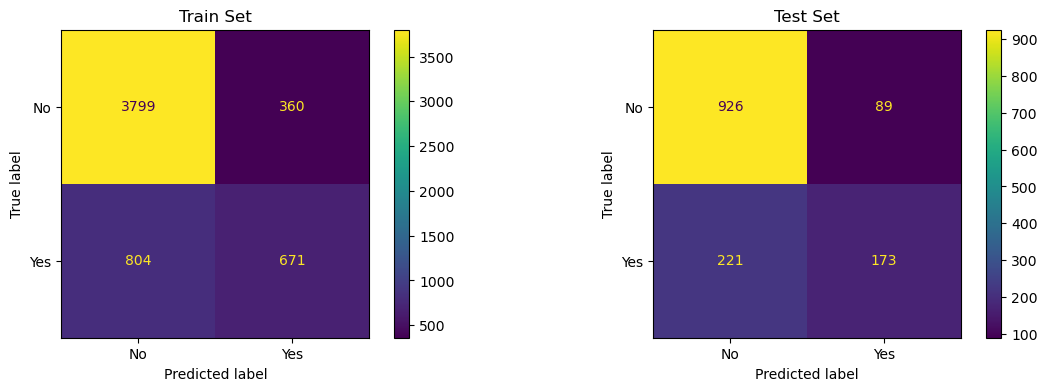

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_log)
cm_test = confusion_matrix(y_test_np, y_pred_test_log)

ConfusionMatrixDisplay(cm_train, display_labels=log_model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")
            
ConfusionMatrixDisplay(cm_test, display_labels=log_model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

# Knn Classifier Model

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

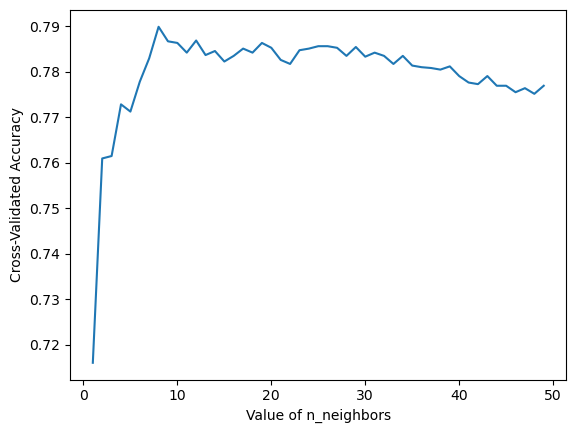

The best value of n_neighbors is 8


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Create KNN model
knn_model = KNeighborsClassifier()

# Create list of values of n_neighbors to evaluate
n_neighbors = range(1, 50)

# Evaluate KNN model for each value of n_neighbors using 10-fold cross-validation
scores = []
for n in n_neighbors:
    knn_model.set_params(n_neighbors=n)
    score = cross_val_score(knn_model, X_train_sc, y_train, cv=10, scoring='accuracy').mean()
    scores.append(score)

# Plot the results
plt.plot(n_neighbors, scores)
plt.xlabel('Value of n_neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Select best value of n_neighbors based on cross-validation results
best_n_neighbor = n_neighbors[np.argmax(scores)]
print(f"The best value of n_neighbors is {best_n_neighbor}")

In [18]:
def get_model_KNeighborsClassifier(X_tn, X_tt, y_tn, y_tt, n_neighbors = n):
    scaler = StandardScaler()
    
    X_tn_sc = scaler.fit_transform(X_tn)
    X_tt_sc = scaler.transform(X_tt)

    X_tn_sc = pd.DataFrame(X_tn_sc, columns = selected_features)
    X_tt_sc  = pd.DataFrame(X_tt_sc, columns = selected_features)
    
    knn_model = KNeighborsClassifier(n_neighbors = n, weights = 'uniform') 
    
    knn_model.fit(X_tn_sc, y_tn) 
    
    return knn_model

In [19]:
knn_model = KNeighborsClassifier(n_neighbors = best_n_neighbor, weights = 'uniform') 
knn_model.fit(X_train_sc, y_train) 

y_pred = knn_model.predict(X_test_sc) 

y_pred_train_knn = knn_model.predict(X_train_sc)
y_pred_test_knn = knn_model.predict(X_test_sc)

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [20]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_knn),
                                          precision_score(y_train_np, y_pred_train_knn, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_knn, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_knn),
                                         precision_score(y_test_np, y_pred_test_knn, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_knn, pos_label='Yes')]})

display(performance_knn)

,Error_metric,Train,Test
0,Accuracy,0.817536,0.770050
1,Precision,0.760793,0.650862
2,Recall,0.442034,0.383249


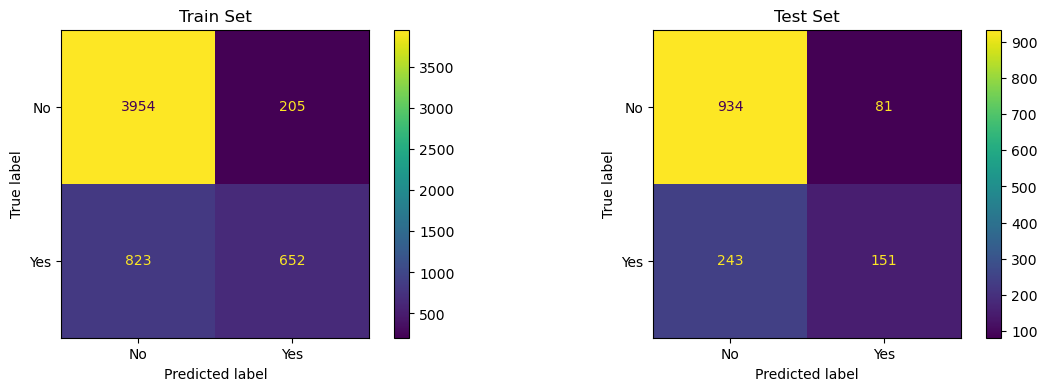

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_knn)
cm_test = confusion_matrix(y_test_np, y_pred_test_knn)

ConfusionMatrixDisplay(cm_train, display_labels=knn_model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=knn_model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

# Decision Tree Classifier

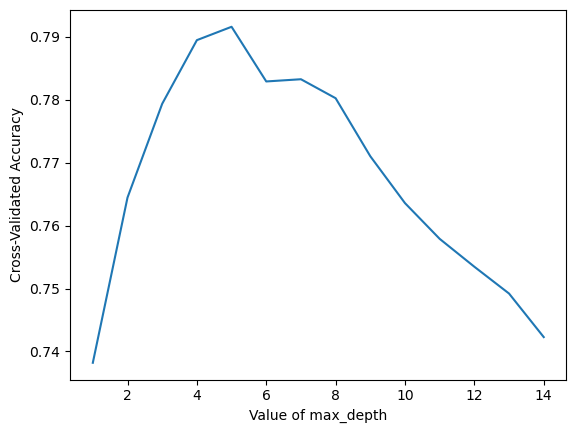

The best value of max_depth is 5


In [22]:
# get the best max_depth 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Create list of values of max_depth to evaluate
max_depths = range(1, 15)

# Evaluate Decision Tree model for each value of max_depth using 10-fold cross-validation
scores = []
for depth in max_depths:
    dt_model.set_params(max_depth=depth)
    # no need to scale the train and test set, so X_train istead of X_train_sc
    score = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy').mean()
    scores.append(score)

# Plot the results
plt.plot(max_depths, scores)
plt.xlabel('Value of max_depth')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Select best value of max_depth based on cross-validation results
best_max_depth = max_depths[np.argmax(scores)]
print(f"The best value of max_depth is {best_max_depth}")

In [23]:
def get_model_DecisionTreeClassifier(X_tn, X_tt, y_tn, y_tt, max_depth = n):
    
    dt_model = DecisionTreeClassifier(max_depth = n)  
    
    dt_model.fit(X_tn, y_tn) 

    y_pred = dt_model.predict(X_tt) 
    
    return dt_model

In [24]:
dt_model = DecisionTreeClassifier(max_depth = best_max_depth)

dt_model.fit(X_train, y_train) 

y_pred = dt_model.predict(X_test) 

y_pred_train_td = dt_model.predict(X_train)
y_pred_test_td = dt_model.predict(X_test)

In [25]:
X_train

,SeniorCitizen,MonthlyCharges,TotalCharges
6924,0,69.35,69.350000
5249,0,67.20,4671.700000
5852,1,69.10,1474.750000
3597,0,95.70,2338.350000
4147,1,24.85,1901.000000
...,...,...,...
5218,0,19.70,2283.300441
4060,0,63.35,3409.100000
1346,0,87.25,1258.600000
3454,1,35.65,1025.150000


<BarContainer object of 3 artists>

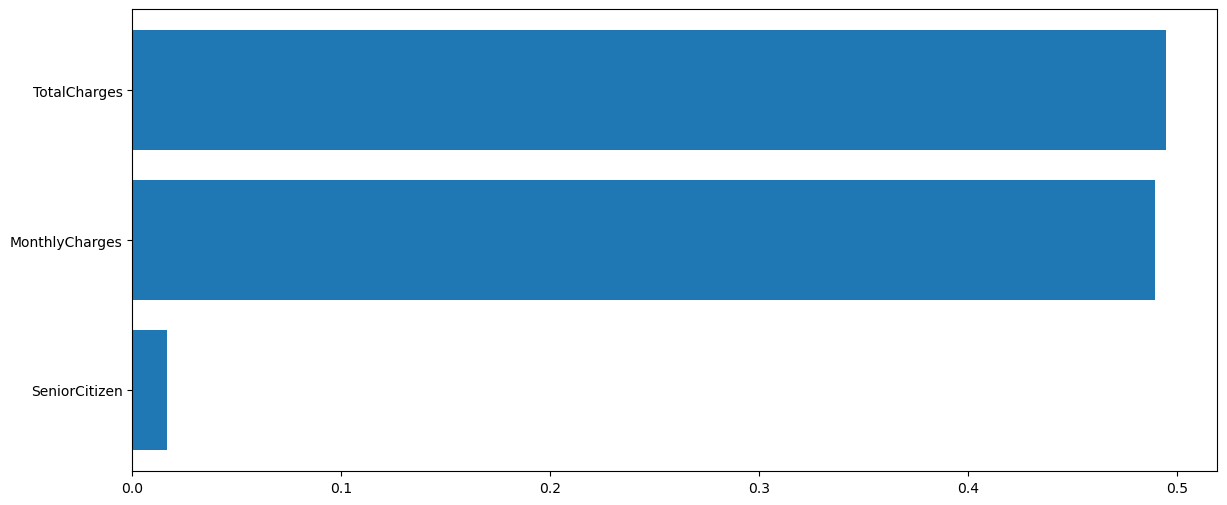

In [26]:
plt.figure(figsize=(14,6))
plt.barh(X.columns,dt_model.feature_importances_)

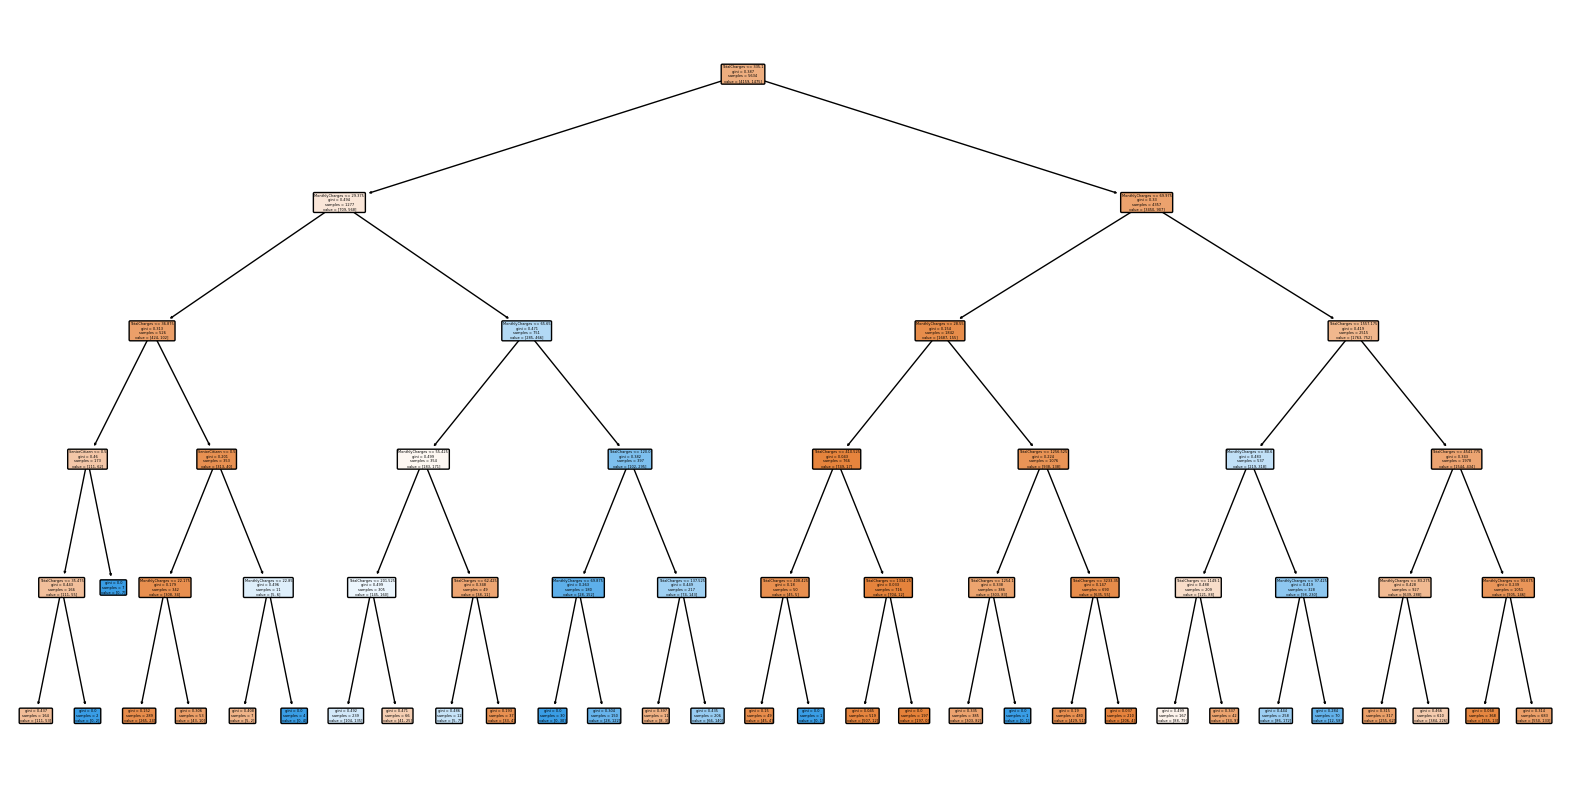

In [27]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(dt_model, 
          filled = True, 
          rounded = True,  
          # show the feature names
          feature_names = X_train.columns)
plt.show()

In [28]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_td = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_td),
                                          precision_score(y_train_np, y_pred_train_td, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_td, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_td),
                                         precision_score(y_test_np, y_pred_test_td, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_td, pos_label='Yes')]})

display(performance_td)

,Error_metric,Train,Test
0,Accuracy,0.805289,0.780696
1,Precision,0.692857,0.672065
2,Recall,0.460339,0.421320


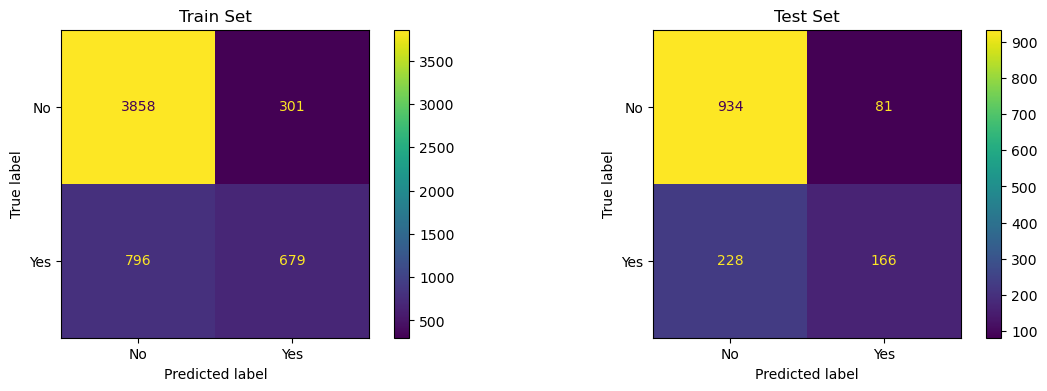

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_td)
cm_test = confusion_matrix(y_test_np, y_pred_test_td)

ConfusionMatrixDisplay(cm_train, display_labels=dt_model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=dt_model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

# Cross Validation

In [30]:
model_pipeline = [log_model, knn_model, dt_model]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'Logistical Regression': 0.7934031845609261, 'K-Nearest Neighbors': 0.7898526762656992, 'Decision Tree': 0.7916213169066425}


In [31]:
print("Comparing the 3 regression scores we find \n")

compare_models = pd.DataFrame([scores], index=["score"])
compare_models

Comparing the 3 regression scores we find 



,Logistical Regression,K-Nearest Neighbors,Decision Tree
score,0.793403,0.789853,0.791621


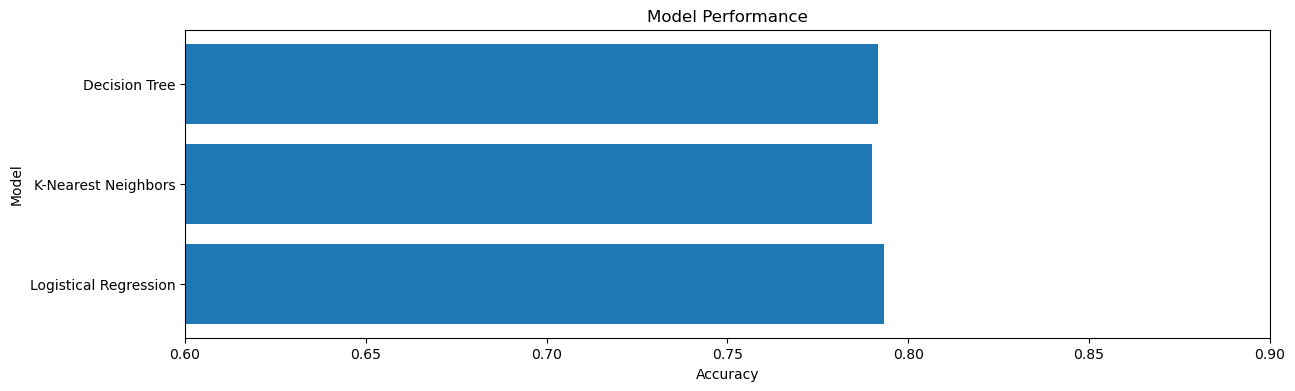

In [32]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14,4))

# Create the horizontal bar chart
ax.barh(list(scores.keys()), list(scores.values()))

# Set the title and axis labels
ax.set_title('Model Performance')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')

# Set the x-axis range
ax.set_xlim([0.6, 0.9])

# Display the chart
plt.show()

# Imbalance in the Dataset

## Using SMOTE

In [33]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Check the inbalance
y_train.value_counts()

No     4159
Yes    1475
Name: Churn, dtype: int64

In [35]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

Yes    4159
No     4159
Name: Churn, dtype: int64

In [36]:
# apply to upsampled train sets and get models
log_model_sm = get_model_LogisticRegression(X_train_sm, X_test, y_train_sm, y_test)
knn_model_sm = get_model_KNeighborsClassifier(X_train_sm, X_test, y_train_sm, y_test, n_neighbors = best_n_neighbor)
dt_model_sm = get_model_DecisionTreeClassifier(X_train_sm, X_test, y_train_sm, y_test, max_depth = best_max_depth)

In [37]:
model_pipeline = [log_model_sm, knn_model_sm, dt_model_sm]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores_sm = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_sm, y_train_sm, cv=10))
    scores_sm[model_names[i]] = mean_score
    i = i+1
print(scores_sm)

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'Logistical Regression': 0.7198836550032399, 'K-Nearest Neighbors': 0.7250538044987503, 'Decision Tree': 0.7470579642229012}


In [38]:
scores_sm_df = pd.DataFrame([scores_sm], index=["Upsampling (SMOTE)"])
scores_sm_df['sampling'] = 'Upsampling (SMOTE)'
scores_sm_df

,Logistical Regression,K-Nearest Neighbors,Decision Tree,sampling
Upsampling (SMOTE),0.719884,0.725054,0.747058,Upsampling (SMOTE)


## Using Pandas Sample

In [39]:
# Assemble train set

train = pd.concat([X_train, y_train.to_frame()], axis=1)

category_no = train[train['Churn'] == 'No'] # negative class (majority)
category_yes = train[train['Churn'] == 'Yes'] # positive class (minority)

no_len = len(category_no)

category_yes_up = category_yes.sample(no_len, replace = True)

In [40]:
# reassemble the data
train_up = pd.concat([category_no, category_yes_up], axis=0)
# shuffle the data
train_up = train_up.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
train_up['Churn'].value_counts()

No     4159
Yes    4159
Name: Churn, dtype: int64

In [41]:
X_train_up = train_up.drop(['Churn'], axis=1)
y_train_up = train_up['Churn']

In [42]:
# apply to upsampled train sets and get models
log_model_up = get_model_LogisticRegression(X_train_up, X_test, y_train_up, y_test)
knn_model_up = get_model_KNeighborsClassifier(X_train_up, X_test, y_train_up, y_test, n_neighbors = best_n_neighbor)
dt_model_up = get_model_DecisionTreeClassifier(X_train_up, X_test, y_train_up, y_test, max_depth = best_max_depth)

In [43]:
model_pipeline = [log_model_up, knn_model_up, dt_model_up]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores_up = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_up, y_train_up, cv=5))
    scores_up[model_names[i]] = mean_score
    i = i+1
print(scores_up)

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'Logistical Regression': 0.7255320840464407, 'K-Nearest Neighbors': 0.7231290329108655, 'Decision Tree': 0.8592202605347149}


In [44]:
scores_up_df = pd.DataFrame([scores_up], index=["Upsampling (Pandas Sample)"])
scores_up_df['sampling'] = 'Upsampling (Pandas Sample)'
scores_up_df

,Logistical Regression,K-Nearest Neighbors,Decision Tree,sampling
Upsampling (Pandas Sample),0.725532,0.723129,0.85922,Upsampling (Pandas Sample)


## Downsampling

### Using TomekLinks

In [45]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority') # resample only the majority class
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train) # returns resampled data
y_train_tl.value_counts() # check the distribution of resampled labels

No     3710
Yes    1475
Name: Churn, dtype: int64

In [46]:
# apply to upsampled train sets and get models
log_model_tl = get_model_LogisticRegression(X_train_tl, X_test, y_train_tl, y_test)
knn_model_tl = get_model_KNeighborsClassifier(X_train_tl, X_test, y_train_tl, y_test, n_neighbors = best_n_neighbor)
dt_model_tl = get_model_DecisionTreeClassifier(X_train_tl, X_test, y_train_tl, y_test, max_depth = best_max_depth)

In [47]:
model_pipeline = [log_model_tl, knn_model_tl, dt_model_tl]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores_tl = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_tl, y_train_tl, cv=5))
    scores_tl[model_names[i]] = mean_score
    i = i+1
print(scores_tl)

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'Logistical Regression': 0.7915139826422373, 'K-Nearest Neighbors': 0.7807135969141756, 'Decision Tree': 0.7529411764705882}


In [48]:
scores_tl_df = pd.DataFrame([scores_tl], index=["Downsampling (TomekLinks)"])
scores_tl_df['sampling'] = 'Downsampling (TomekLinks)'
scores_tl_df

,Logistical Regression,K-Nearest Neighbors,Decision Tree,sampling
Downsampling (TomekLinks),0.791514,0.780714,0.752941,Downsampling (TomekLinks)


### Using Pandas Sample

In [49]:
# Assemble train set

train = pd.concat([X_train, y_train.to_frame()], axis=1)

category_no = train[train['Churn'] == 'No'] # negative class (majority)
category_yes = train[train['Churn'] == 'Yes'] # positive class (minority)

yes_len = len(category_yes)

category_no_down = category_no.sample(yes_len)

In [50]:
# reassemble the data
train_down = pd.concat([category_no_down, category_yes], axis=0)
# shuffle the data
train_down = train_down.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
train_down['Churn'].value_counts()

No     1475
Yes    1475
Name: Churn, dtype: int64

In [51]:
X_train_down = train_down.drop(['Churn'], axis=1)
y_train_down = train_down['Churn']

In [52]:
# apply to upsampled train sets and get models
log_model_down = get_model_LogisticRegression(X_train_down, X_test, y_train_down, y_test)
knn_model_down = get_model_KNeighborsClassifier(X_train_down, X_test, y_train_down, y_test, n_neighbors = best_n_neighbor)
dt_model_down = get_model_DecisionTreeClassifier(X_train_down, X_test, y_train_down, y_test, max_depth = best_max_depth)

In [53]:
model_pipeline = [log_model_down, knn_model_down, dt_model_down]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores_down = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_down, y_train_down, cv=5))
    scores_down[model_names[i]] = mean_score
    i = i+1
print(scores_down)

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'Logistical Regression': 0.716271186440678, 'K-Nearest Neighbors': 0.6966101694915254, 'Decision Tree': 0.6498305084745762}


In [54]:
scores_down_df = pd.DataFrame([scores_down], index=["Downsampling (Pandas Sample)"])
scores_down_df['sampling'] = 'Downsampling (Pandas Sample)'
scores_down_df

,Logistical Regression,K-Nearest Neighbors,Decision Tree,sampling
Downsampling (Pandas Sample),0.716271,0.69661,0.649831,Downsampling (Pandas Sample)


# Compare Sampling Methods

In [55]:
compare_models['sampling'] = 'None'

In [56]:
method_scores = pd.concat([scores_sm_df, scores_up_df, scores_tl_df, scores_down_df, compare_models], axis=0)
method_scores.reset_index(drop = True)

,Logistical Regression,K-Nearest Neighbors,Decision Tree,sampling
0,0.719884,0.725054,0.747058,Upsampling (SMOTE)
1,0.725532,0.723129,0.859220,Upsampling (Pandas Sample)
2,0.791514,0.780714,0.752941,Downsampling (TomekLinks)
3,0.716271,0.696610,0.649831,Downsampling (Pandas Sample)
4,0.793403,0.789853,0.791621,None
